# Formatting

**df2img** uses the [plotly](https://plotly.com/python/) library in the background in order to create tables. That
means, you can take advantage of all the formatting capabilities provided by [plotly](https://plotly.com/python/).

The most important things with respect to the layout of a table can be controlled via input arguments to **df2img**'s
``plot_dataframe()`` function.

* Title
  * Title text
  * Font color
  * Font size
  * Font family
  * Horizontal alignment
* Turning on/off the header row visibility
* Table header and table cells
  * Font color
  * Font size
  * Font family
  * Fill/background color
  * Horizontal alignment of individual/multiple columns
  * Row height
  * Line width
* Possibility to alternate row colors for better readability
* Width of individual/multiple columns
* Figure size

All the following examples will use ``df``.

In [1]:
import pandas as pd

import df2img


df = pd.DataFrame(
    data=dict(
        float_col=[1.4, float("NaN"), 250, 24.65],
        str_col=("string1", "string2", float("NaN"), "string4"),
    ),
    index=["row1", "row2", "row3", "row4"],
)

df

,float_col,str_col
row1,1.40,string1
row2,NaN,string2
row3,250.00,NaN
row4,24.65,string4


## Title

Setting the title will be controlled via the ``title`` input argument. ``title`` takes a ``dict``. Some of the more
important keys you can use are

* ``text``
* ``font_color``
* ``font_size``
* ``font_family``
* ``x``
* ``xanchor``

You can find all the relevant key/value pairs here: https://plotly.com/python/reference/layout/#layout-title.

Let's insert a title and specify ``font_family`` and ``font_size``. We can control the alignment via the ``x``
key/value pair. It sets the x (horizontal) position in normalized coordinates from "0" (left) to "1" (right).

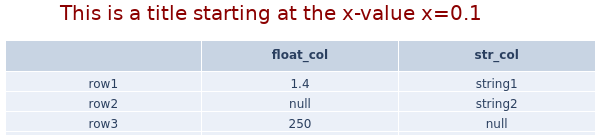

In [2]:
fig=df2img.plot_dataframe(
    df,
    title=dict(
        text="This is a title starting at the x-value x=0.1",
        font_color="darkred",
        font_size=20,
        font_family="Times New Roman",
        x=0.1,
        xanchor="left",
    ),
    fig_size=(600, 140),
)

## Header row visibility

You can turn on/off the header row via the ``tbl_header_visible`` input argument. It is set to ``True`` by default.


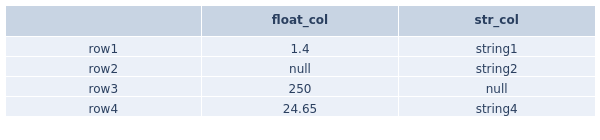

In [3]:
fig=df2img.plot_dataframe(
    df,
    tbl_header_visible=True,  # default value
    fig_size=(600, 140)
)

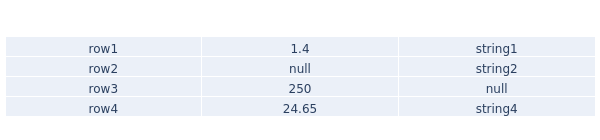

In [4]:
fig=df2img.plot_dataframe(
    df,
    tbl_header_visible=False,
    fig_size=(600, 140)
)

## Table header

You can control the settings for the header row via the ``tbl_header`` input argument. This accepts a regular ``dict``.
This ``dict`` can comprise various key/value pairs that are also accepted by ``plotly``. All available key/value pairs
can be seen at ``plotly``'s website at https://plotly.com/python/reference/table/#table-header.

Let's set the header row in a different color and size. Also, let's set the alignment to "left".

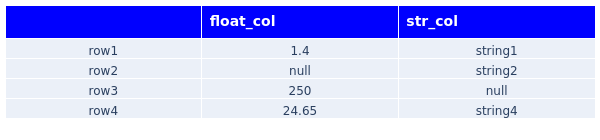

In [5]:
fig = df2img.plot_dataframe(
    df,
    tbl_header=dict(
        align="left",
        fill_color="blue",
        font_color="white",
        font_size=14,
    ),
    fig_size=(600, 140),
)

## Table cells

Controlling the table body (cells) is basically the same. Just use the ``tbl_cells`` input argument, which happens to be
a ``dict``, too. See https://plotly.com/python/reference/table/#table-cells for all the possible key/value pairs.

Let's print the table cell values in yellow on a green background and align them "right".

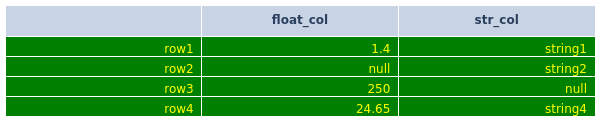

In [6]:
fig = df2img.plot_dataframe(
    df,
    tbl_cells=dict(
        align="right",
        fill_color="green",
        font_color="yellow",
    ),
    fig_size=(600, 140),
)

You can vary the row height or the line width. Let's increase both to see the difference.

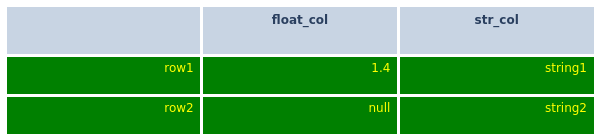

In [7]:
fig = df2img.plot_dataframe(
    df,
    tbl_header=dict(
        height=50,
        line_width=3,
    ),
    tbl_cells=dict(
        align="right",
        fill_color="green",
        font_color="yellow",
        height=40,
        line_width=3,
    ),
    fig_size=(600, 140),
)


## Alternate row colors

Sometimes it might make sense to alternate row colors. That increases readability. Just provide a ``tuple`` of color
values to the ``row_fill_color`` input argument. Using HEX colors is also possible.

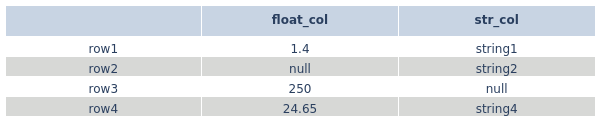

In [8]:
fig = df2img.plot_dataframe(
    df,
    row_fill_color=("#ffffff", "#d7d8d6"),
    fig_size=(600, 140),
)


## Controlling column width

You can also control **relative** column width via the ``col_width`` argument. Columns fill the available width in
proportion of their specified column widths. For example, let's set the first column's width triple
the width of the third column and the second column's width double the width of the third column.

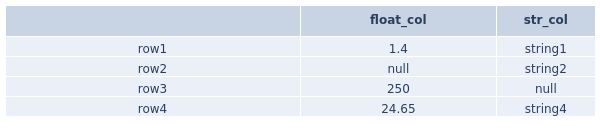

In [9]:
fig = df2img.plot_dataframe(
    df,
    col_width=[3, 2, 1],
    fig_size=(600, 140),
)


Now, what about if the second column should be double as wide as the other columns? - Just specify
``col_width=[0.5, 1, 0.5]``. The absolute numbers don't have any meaning. Important is simply the proportion to each
other. Specifying ``col_width=[100, 200, 100]`` would lead to the exact same result.

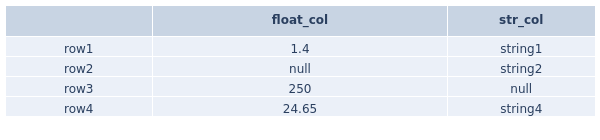

In [10]:
fig = df2img.plot_dataframe(
    df,
    col_width=[0.5, 1, 0.5],
    fig_size=(600, 140),
)


## Sizing the whole figure

The ``fig_size`` keyword argument takes a ``tuple`` of integer values. They specify the width and height of the overall
figure. If you set the numbers too low, it might happen that part of the image will get cropped (as in the first
example). If you set the numbers too large, you might end up with too much white space around the image.

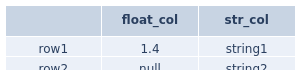

In [11]:
fig = df2img.plot_dataframe(df, fig_size=(300, 75))

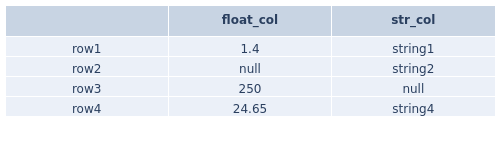

In [12]:
fig = df2img.plot_dataframe(df, fig_size=(500, 150))

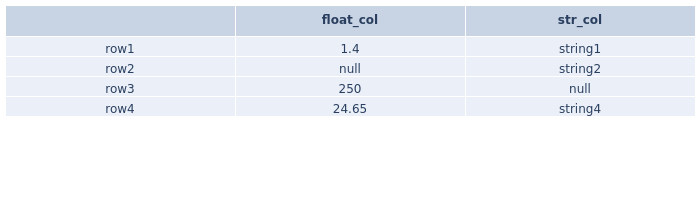

In [13]:
fig = df2img.plot_dataframe(df, fig_size=(700, 200))

## Making use of ``plotly``'s formatting functionality

``plotly`` accepts a large number of layout-related keyword arguments for its graph objects. You can find a detailed descriptions at https://plotly.com/python-api-reference/generated/plotly.graph_objects.Layout.html.  
You can make use of those settings via the ``**layout_kwargs`` input argument of the ``plot_dataframe`` function. It allows you to pass through various keyword arguments to ``plotly``'s layout function.

For example, let's say you want to change the background color of your plot. ``plotly`` accepts a keyword argument called ``paper_bgcolor``, which you can simply pass through.

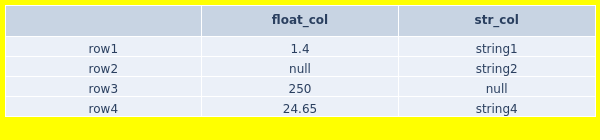

In [14]:
fig = df2img.plot_dataframe(df, fig_size=(600, 140), paper_bgcolor="yellow")

You can also pass rgba color values. If you want to make the background transparent, pass ``rgba(0, 0, 0, 0)``.

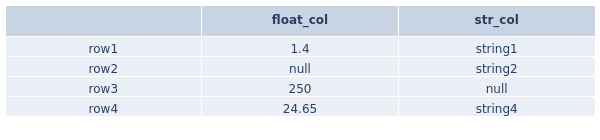

In [15]:
fig = df2img.plot_dataframe(df, fig_size=(600, 140), paper_bgcolor="rgba(0, 0, 0, 0)")